<a href="https://colab.research.google.com/github/BaseKan/aiday_training_resources/blob/main/TF_basics/Oplossingen_huiswerk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
print(tf.__version__)

2.4.1


**Opdracht een & twee** Train een deep learning model op de Diabetes dataset (met maar een kolom) met maar een Dense laag met maar 1 neuron (unit). Train een lineair regressiemodel met sklearn. Maak daarna een scatterplot van de traindata met op de x-as de eerste kolom van de traindata en op de y-as de y_train. Voeg nu twee lijnen toe die met voorspelling van het sklearn model en het keras model.

In [2]:
# inladen data
data = load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(data['data'],data['target'],test_size=0.2, random_state=42)

# we houden voor deze opdracht enkel kolom drie
x_train = x_train[:,2]
x_test = x_test[:,2]

# definieren model - gebruiken de alternatieve methode van definieren
input = layers.Input(shape=(1,))
dense = layers.Dense(1)
output = dense(input)

regressie_model = models.Model(input,output)

# definieren sklearn model
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(x_train.reshape(-1,1),y_train)
y_SK = lm.predict(x_train.reshape(-1,1))

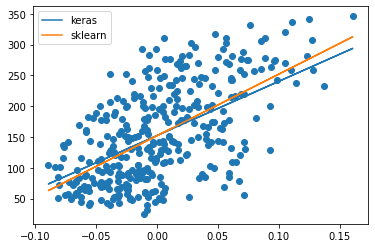

In [4]:
# compilen model
rate = 0.5
rate_slow = 0.08
epochs = 250
def schedule(epoch, lr):
  if epoch >= 50:
    return rate_slow
  return rate
 
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

regressie_model.compile(optimizer=SGD(rate,0.9),
                        loss='mse')

# callback voor plot

class Plot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, batch, logs={}):
    clear_output(wait=True)
    y_DL = regressie_model.predict(x_train)
    plt.scatter(x_train,y_train)
    plt.plot(x_train,y_DL, label='keras')
    plt.plot(x_train,y_SK, label='sklearn')
    plt.legend()
    plt.show()


# trainen model
history = regressie_model.fit(x=x_train,
                    y=y_train,
                    batch_size=x_train.shape[0],
                    epochs=epochs,
                    callbacks=[scheduler,Plot()]
                    )

**Opdracht drie** Gebruik nu alle diabetesdata en train een lineair regressiemodel. Train nu een deep learning model met betere validatie score. Vergelijke de MSE op de test set. 

In [5]:
# inladen data
data = load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(data['data'],data['target'],test_size=0.2, random_state=42)

# definieren model - gebruiken de alternatieve methode van definieren
input = layers.Input(shape=(x_train.shape[1],))
dense = layers.Dense(64)(input)
dense1 = layers.Dense(32)(dense)
output = layers.Dense(1)(dense1)

regressie_model2 = models.Model(input,output)

regressie_model2.compile(optimizer=SGD(5e-5,0.9),
                        loss='mse')

history2 = regressie_model2.fit(x=x_train,
                    y=y_train,
                    batch_size=40,
                    epochs=40,
                     validation_split=0.2)

# definieren sklearn model
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression().fit(x_train,y_train)

Epoch 1/40
8/8 [==============================] - 0s 28ms/step - loss: 30769.7552 - val_loss: 21857.0957
Epoch 2/40
8/8 [==============================] - 0s 7ms/step - loss: 28446.3030 - val_loss: 16861.6699
Epoch 3/40
8/8 [==============================] - 0s 7ms/step - loss: 18353.6505 - val_loss: 10416.1729
Epoch 4/40
8/8 [==============================] - 0s 7ms/step - loss: 7888.0159 - val_loss: 4471.9531
Epoch 5/40
8/8 [==============================] - 0s 7ms/step - loss: 7634.9425 - val_loss: 4303.0088
Epoch 6/40
8/8 [==============================] - 0s 7ms/step - loss: 6015.7782 - val_loss: 5269.1890
Epoch 7/40
8/8 [==============================] - 0s 7ms/step - loss: 5759.1080 - val_loss: 4830.3330
Epoch 8/40
8/8 [==============================] - 0s 7ms/step - loss: 5023.7219 - val_loss: 3874.8469
Epoch 9/40
8/8 [==============================] - 0s 7ms/step - loss: 4929.4722 - val_loss: 4672.5117
Epoch 10/40
8/8 [==============================] - 0s 7ms/step - loss: 4533

In [6]:
print('Linear regression test MSE', np.mean((regressie_model2.predict(x_test)-y_test)**2))
print('Deep Learning test MSE',np.mean((lm2.predict(x_test)-y_test)**2))

Linear regression test MSE 8302.945610677025
Deep Learning test MSE 2900.1732878832318


**Opdracht vier** Ontwerp en train een meerlaags classificatiemodel op de breast cancer dataset. 

*   De activatie van je laatste laag moet voor binaire classificatie 'sigmoid' zijn (als er meer dan twee klassen waren geweest hadden we 'softmax' gebruikt)

*   Als loss kan je 'binary_crossentropy' gebruiken

Er zijn veel metrieken die je kan bekijken, bijvoorbeeld: precision, accuracy, recall, etc. 

In [7]:
# inladen data
data = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(data['data'],data['target'],test_size=0.2, random_state=42)

# definieren model - gebruiken de alternatieve methode van definieren
input = layers.Input(shape=(x_train.shape[1],))
dense = layers.Dense(64)(input)
dense1 = layers.Dense(32)(dense)
output = layers.Dense(1,activation='sigmoid')(dense1)

logregressie_model = models.Model(input,output)

In [8]:
logregressie_model.compile(optimizer=SGD(5e-6,0.7),
                        loss='binary_crossentropy',
                        metrics=['Accuracy','Precision','Recall']
)

history2 = logregressie_model.fit(x=x_train,
                    y=y_train,
                    batch_size=40,
                    epochs=40,
                     validation_split=0.2)

Epoch 1/40
10/10 [==============================] - 1s 42ms/step - loss: 22.5026 - accuracy: 0.1596 - precision: 0.4790 - recall: 0.4571 - val_loss: 11.6062 - val_accuracy: 0.0110 - val_precision: 0.6071 - val_recall: 0.8793
Epoch 2/40
10/10 [==============================] - 0s 6ms/step - loss: 7.6275 - accuracy: 0.0087 - precision: 0.5116 - recall: 0.3814 - val_loss: 8.0659 - val_accuracy: 0.0000e+00 - val_precision: 0.6104 - val_recall: 0.8103
Epoch 3/40
10/10 [==============================] - 0s 7ms/step - loss: 7.3643 - accuracy: 0.0104 - precision: 0.5361 - recall: 0.3365 - val_loss: 6.5391 - val_accuracy: 0.0000e+00 - val_precision: 0.2500 - val_recall: 0.0172
Epoch 4/40
10/10 [==============================] - 0s 6ms/step - loss: 3.2497 - accuracy: 0.0000e+00 - precision: 0.6459 - recall: 0.3099 - val_loss: 15.2784 - val_accuracy: 0.2747 - val_precision: 0.6374 - val_recall: 1.0000
Epoch 5/40
10/10 [==============================] - 0s 7ms/step - loss: 6.2976 - accuracy: 0.114

In [9]:
# definieren sklearn model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression().fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
acc_DL = (np.array(tf.greater(logregressie_model.predict(x_test),.5)).flatten().astype('int') == y_test).sum()/y_test.shape[0]*100
print('Accuracy of deep learning model is',acc_DL)
acc_SK = (LogReg.predict(x_test)==y_test).sum()/y_test.shape[0]*100
print('Accuracy of Logistic Regression model is',acc_SK)

Accuracy of deep learning model is 70.17543859649122
Accuracy of Logistic Regression model is 95.6140350877193


**Bonus: ensembling/stacking** Laten we kijken of we met stacking het bovenstaande deep learning model kunnen verslaan. Bij ensemblen trainen we in dit geval een netwerk met maar een laag, die de optimale combinatie van voorspelling zoekt van andere modellen. Doorloop de volgende 3 stappen:
1. Train drie verschillende classificatiemodellen met sklearn, bijvoorbeeld randomforest, logistic regression en KNN
2. Maak een nieuw numpy array met 3 kolommen, waar elke kolom de voorspellingen bevat van de drie sklearn modellen op de dataset x_train. 
3. Gebruik dit nieuwe dataframe als input voor een eenlaags neuraal netwerk met 1 neuron (zoals we bij opdracht een hadden ontworpen). De labels blijven natuurlijk y_train. 

Gefeliciteerd je hebt nu een ensemble model getraind! Om te testen of dit model beter werkt dan je deep learning model moet je nog 2 stappen doorlopen.

i. Maak een nieuw dataframe met 3 kolommen, waar elke kolom de voorspellingen bevat van de drie sklearn modellen op de dataset x_test.

ii. Doe model.predict op deze nieuwe dataset en bereken handmatig de loss en metrieken. 

*Nota bene: je kan de resultaten nog verder verbeteren door 4 modellen te ensemblen, waarvan het vierde model je deep learning model uit opdracht 3 is*

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

RF = RandomForestClassifier().fit(x_train,y_train)
KNN = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)

ensemble_train = np.transpose(np.array([LogReg.predict_proba(x_train)[:,1],RF.predict_proba(x_train)[:,1],KNN.predict_proba(x_train)[:,1]]))

In [28]:
ensembler = models.Sequential()
ensembler.add(layers.Input(shape=(3)))
ensembler.add(layers.Dense(units=1, activation='sigmoid'))

ensembler.compile(optimizer=SGD(1e-2,0.7),
                        loss='binary_crossentropy',
                        metrics=['Accuracy','Precision','Recall']
)
                  
ensembler_history = ensembler.fit(x=ensemble_train,
                    y=y_train,
                    batch_size=40,
                    epochs=40,
                     validation_split=0.2)

Epoch 1/40
10/10 [==============================] - 1s 38ms/step - loss: 0.6771 - accuracy: 0.0000e+00 - precision: 0.6702 - recall: 0.8531 - val_loss: 0.6443 - val_accuracy: 0.0000e+00 - val_precision: 0.6463 - val_recall: 0.9138
Epoch 2/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6174 - accuracy: 0.0000e+00 - precision: 0.6262 - recall: 0.9626 - val_loss: 0.5878 - val_accuracy: 0.0000e+00 - val_precision: 0.6395 - val_recall: 0.9483
Epoch 3/40
10/10 [==============================] - 0s 6ms/step - loss: 0.5611 - accuracy: 0.0000e+00 - precision: 0.6440 - recall: 0.9872 - val_loss: 0.5501 - val_accuracy: 0.0000e+00 - val_precision: 0.6477 - val_recall: 0.9828
Epoch 4/40
10/10 [==============================] - 0s 6ms/step - loss: 0.5215 - accuracy: 0.0000e+00 - precision: 0.6504 - recall: 0.9820 - val_loss: 0.5203 - val_accuracy: 0.0000e+00 - val_precision: 0.6477 - val_recall: 0.9828
Epoch 5/40
10/10 [==============================] - 0s 6ms/step - loss: 0.4859 

In [29]:
ensembler_test = np.transpose(np.array([LogReg.predict_proba(x_test)[:,1],RF.predict_proba(x_test)[:,1],KNN.predict_proba(x_test)[:,1]]))
acc_DL = (np.array(tf.greater(ensembler.predict(ensembler_test),.5)).flatten().astype('int') == y_test).sum()/y_test.shape[0]*100
print('Accuracy of ensembler model is',acc_DL)
acc_LR = (LogReg.predict(x_test)==y_test).sum()/y_test.shape[0]*100
print('Accuracy of Logistic Regression model is',acc_SK)
acc_KNN = (KNN.predict(x_test)==y_test).sum()/y_test.shape[0]*100
print('Accuracy of K-nearest neighbors model is',acc_SK)
acc_RF = (RF.predict(x_test)==y_test).sum()/y_test.shape[0]*100
print('Accuracy of Random Forest model is',acc_SK)

Accuracy of ensembler model is 96.49122807017544
Accuracy of Logistic Regression model is 95.6140350877193
Accuracy of K-nearest neighbors model is 95.6140350877193
Accuracy of Random Forest model is 95.6140350877193
